In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset-in yüklənməsi
df = pd.read_csv('LinkedIn people profiles datasets.csv')

# Dataset-in ümumi məlumatları
print(f"Dataset ölçüsü: {df.shape}")
print(f"Sütunlar sayı: {df.columns.tolist()}")

# Missing data analizi
df.isnull().sum()


Dataset ölçüsü: (1000, 26)
Sütunlar sayı: ['timestamp', 'id', 'name', 'city', 'country_code', 'region', 'current_company:company_id', 'current_company:name', 'position', 'following', 'about', 'posts', 'groups', 'current_company', 'experience', 'url', 'people_also_viewed', 'educations_details', 'education', 'avatar', 'languages', 'certifications', 'recommendations', 'recommendations_count', 'volunteer_experience', 'сourses']


timestamp                       0
id                              0
name                            0
city                           51
country_code                    2
region                        544
current_company:company_id    428
current_company:name          167
position                       18
following                     519
about                         502
posts                         583
groups                        890
current_company                 0
experience                     94
url                             0
people_also_viewed            177
educations_details            318
education                     280
avatar                        190
languages                     745
certifications                816
recommendations               827
recommendations_count         152
volunteer_experience          884
сourses                       993
dtype: int64

In [2]:
df.drop(columns=['groups', 'languages', 'certifications', 'recommendations','current_company', 'volunteer_experience',
                 'сourses', 'educations_details', 'people_also_viewed', 'posts', 'about', 
                 'current_company:company_id', 'avatar'], inplace=True)
df.columns

Index(['timestamp', 'id', 'name', 'city', 'country_code', 'region',
       'current_company:name', 'position', 'following', 'experience', 'url',
       'education', 'recommendations_count'],
      dtype='object')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   timestamp              1000 non-null   object 
 1   id                     1000 non-null   object 
 2   name                   1000 non-null   object 
 3   city                   949 non-null    object 
 4   country_code           998 non-null    object 
 5   region                 456 non-null    object 
 6   current_company:name   833 non-null    object 
 7   position               982 non-null    object 
 8   following              481 non-null    float64
 9   experience             906 non-null    object 
 10  url                    1000 non-null   object 
 11  education              720 non-null    object 
 12  recommendations_count  848 non-null    float64
dtypes: float64(2), object(11)
memory usage: 101.7+ KB


In [4]:
df['timestamp'] = pd.to_datetime(df['timestamp'], format='mixed')
df['timestamp']

0     2023-10-01
1     2022-12-17
2     2023-05-17
3     2022-05-29
4     2022-06-12
         ...    
995   2022-03-29
996   2022-01-23
997   2021-04-30
998   2022-09-02
999   2022-11-30
Name: timestamp, Length: 1000, dtype: datetime64[ns]

In [5]:
df['following'] = df['following'].fillna(df['following'].mean())

In [6]:
df['city'] = df.groupby('country_code')['city'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))
df[['city','country_code']]

,city,country_code
0,Canada,CA
1,"The Randstad, Netherlands",NL
2,"England, United Kingdom",UK
3,"Avellino, Campania, Italy",IT
4,"Ontario, Canada",CA
...,...,...
995,"Hagen, North Rhine-Westphalia, Germany",DE
996,"Boulder, Colorado, United States",US
997,Romania,RO
998,Greater Houston,US


In [7]:
df['region'] = df.groupby('country_code')['region'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

In [8]:
def standardize_degree(degree_str):
    if not degree_str or not isinstance(degree_str, str):
        return 'BA'

    degree_str = degree_str.lower().strip()

    if any(keyword in degree_str for keyword in ['phd', 'doctor', 'dphil']):
        return 'PhD'
    
    elif any(keyword in degree_str for keyword in [
        'master', 'msc', 'm.s', 'mba', 'ma', 'mttm', 'dess', 'miage', 'bac+5']):
        return 'MS'
    
    elif any(keyword in degree_str for keyword in [
        'bachelor', 'ba', 'b.a', 'bsc', 'llb', 'bm', 'bac+3']):
        return 'BA'
    
    return 'BA'

In [10]:
df['education'] = df['education'].apply(standardize_degree)
df['education'].head(20)

0     MS
1     MS
2     BA
3     MS
4     BA
5     BA
6     BA
7     BA
8     BA
9     BA
10    MS
11    BA
12    BA
13    BA
14    MS
15    MS
16    MS
17    MS
18    BA
19    MS
Name: education, dtype: object

In [11]:
df['recommendations_count'] = df['recommendations_count'].fillna(df['recommendations_count'].mean())

In [14]:
df['current_company:name'] = df['current_company:name'].fillna(df['current_company:name'].mode())

In [15]:
df.isnull().sum()

timestamp                  0
id                         0
name                       0
city                       5
country_code               2
region                    95
current_company:name     166
position                  18
following                  0
experience                94
url                        0
education                  0
recommendations_count      0
dtype: int64

In [12]:
df.dtypes

timestamp                datetime64[ns]
id                               object
name                             object
city                             object
country_code                     object
region                           object
current_company:name             object
position                         object
following                       float64
experience                       object
url                              object
education                        object
recommendations_count           float64
dtype: object

In [16]:
categorical_cols = df.select_dtypes(include='object').columns  

for col in categorical_cols:
    print(df[col].value_counts())    
    print()

id
catherinemcilkenny                              1
dhwani-joshi-                                   1
carli-tyson                                     1
oluwaseun-oluwafemi                             1
dana-evans-6054a051                             1
                                               ..
john-stark-5603534                              1
allaoua-tel-setif-85a00312a                     1
paulmigliorelli                                 1
pidigi-sri-sai-satya-durga-mounika-2b13821b5    1
kubacki-tish-3269977a                           1
Name: count, Length: 1000, dtype: int64

name
Catherine Fitzpatrick (McIlkenny), B.A    1
Dhwani Joshi                              1
Carli Tyson                               1
Seun Oluwafemi                            1
Dana Evans                                1
                                         ..
John Stark                                1
allaoua tel setif                         1
Paul Migliorelli                          1
Pidig

In [17]:
df.groupby('country_code')['following'].mean()

country_code
AE    172.298683
AM     28.000000
AR     81.620582
AT    164.354618
AU    152.481063
         ...    
UY     93.000000
VE     18.000000
VN     59.848233
ZA     89.655146
ZM    144.241164
Name: following, Length: 82, dtype: float64

In [18]:
correlations = df.corr(numeric_only=True)['following'].sort_values(ascending=False)
correlations

following                1.000000
recommendations_count    0.022393
Name: following, dtype: float64

Ən çox təmsil olunan ölkələr:
country_code
US    356
IN     63
GB     53
AU     46
CA     34
DE     34
UK     32
BR     32
NL     23
FR     20
Name: count, dtype: int64


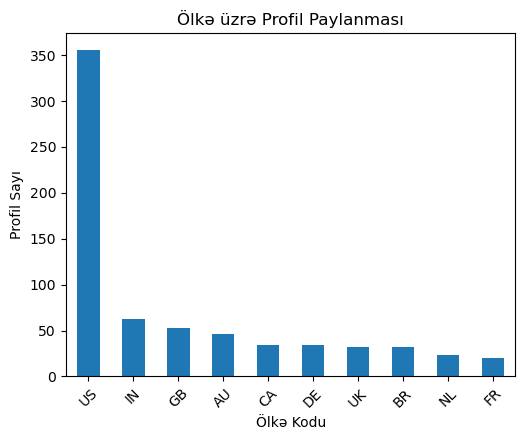

In [11]:
# Ölkə üzrə paylanma
country_distribution = df['country_code'].value_counts().head(10)
print("Ən çox təmsil olunan ölkələr:")
print(country_distribution)

# Vizualizasiya
plt.figure(figsize=(10, 4.5))

plt.subplot(1, 2, 1)
country_distribution.plot(kind='bar')
plt.title('Ölkə üzrə Profil Paylanması')
plt.xlabel('Ölkə Kodu')
plt.ylabel('Profil Sayı')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


Ən aktiv regionlar:
region
EU    209
AS    144
OC     41
SA     36
AF     26
Name: count, dtype: int64


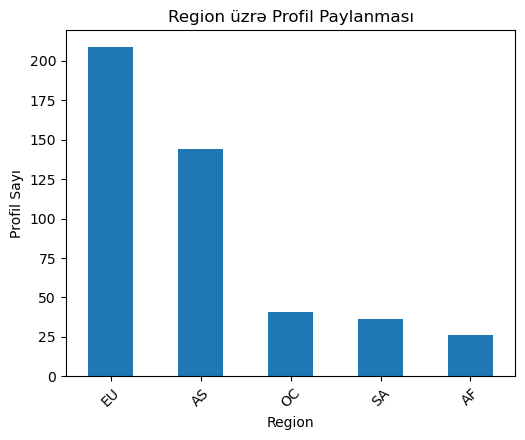

In [12]:
# Region üzrə paylanma
region_distribution = df['region'].value_counts().head(10)
print("\nƏn aktiv regionlar:")
print(region_distribution)

plt.figure(figsize=(10, 4.5))
plt.subplot(1, 2, 2)
region_distribution.plot(kind='bar')
plt.title('Region üzrə Profil Paylanması')
plt.xlabel('Region')
plt.ylabel('Profil Sayı')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [19]:
# Numerik sütunları seçmək
numeric_columns = ['following', 'recommendations_count']
engagement_data = df[numeric_columns].dropna()

print("Engagement Statistikaları:")
print(engagement_data.describe())

def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

for col in numeric_columns:
    if col in df.columns and df[col].dtype in ['float64']:
        outliers, lower, upper = detect_outliers_iqr(df, col)
        print(f"\n{col} sütunu üçün aykırı dəyərlər:")
        print(f"Sərhədlər: {lower:.2f} - {upper:.2f}")
        print(f"Aykırı dəyər sayı: {len(outliers)}")

Engagement Statistikaları:
         following  recommendations_count
count  1000.000000            1000.000000
mean    144.241164               3.365566
std     117.510803               4.083301
min       1.000000               1.000000
25%      66.000000               1.000000
50%     144.241164               2.000000
75%     144.241164               3.365566
max     617.000000              38.000000

following sütunu üçün aykırı dəyərlər:
Sərhədlər: -51.36 - 261.60
Aykırı dəyər sayı: 108

recommendations_count sütunu üçün aykırı dəyərlər:
Sərhədlər: -2.55 - 6.91
Aykırı dəyər sayı: 124


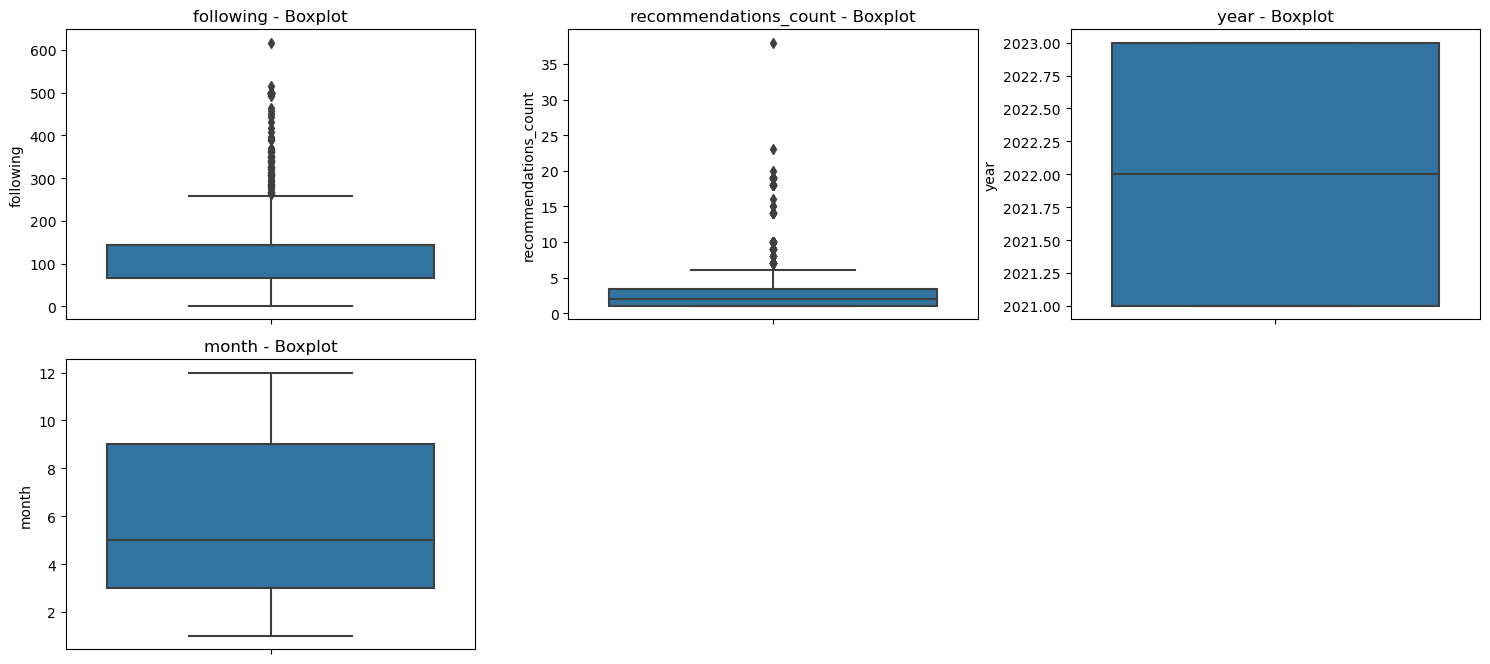

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

numeric_cols = df.select_dtypes(include='number').columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols[:9], 1):  # max 9 subplot
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'{col} - Boxplot')

plt.tight_layout()
plt.show()

In [26]:
from scipy.stats import zscore

numeric_cols = df.select_dtypes(include='number').columns

z_scores = df[numeric_cols].apply(zscore)
threshold = 3
outliers = (z_scores.abs() > threshold)
outlier_rows = outliers.any(axis=1)
print("Outlier sətrlərin sayı:", outlier_rows.sum())

Outlier sətrlərin sayı: 94


In [27]:
from sklearn.preprocessing import MinMaxScaler
numeric_cols = df.select_dtypes(include='number').columns
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [29]:
categorical_cols = ['id', 'name' ,'city', 'country_code', 'region', 'current_company:name']
df_encoded = pd.get_dummies(df_scaled, columns=categorical_cols)

In [30]:
df_encoded.head()

,timestamp,position,following,experience,url,education,recommendations_count,year,month,experience_positions,...,current_company:name_team.blue,current_company:name_tuciudadenred.com,current_company:name_udaan.com,current_company:name_ラブライト,current_company:name_上海兆霁实业有限公司,current_company:name_揭阳市庆展不锈钢有限公司,current_company:name_某大手ゼネコン,current_company:name_江阴芙蓉地产,current_company:name_英特尔,current_company:name_香港卓君国际
0,2023-10-01,Snr Business Analyst at Emploi et Développemen...,0.232534,NaN,https://www.linkedin.com/in/catherinemcilkenny,MS,0.108108,1.0,0.818182,[Naməlum],...,False,False,False,False,False,False,False,False,False,False
1,2022-12-17,Communicatieadviseur Corporate & Strategie Gem...,0.232534,"[{""company"":""Gemeente Utrecht"",""company_id"":""g...",https://www.linkedin.com/in/margot-bon-51a04624,MS,0.027027,0.5,1.000000,"[Naməlum, Naməlum, Naməlum, Naməlum, Naməlum]",...,False,False,False,False,False,False,False,False,False,False
2,2023-05-17,Network Data Manager at Network Rail,0.232534,"[{""company"":""Network Rail"",""company_id"":""netwo...",https://www.linkedin.com/in/mike-dean-8509a193,BA,0.108108,1.0,0.363636,"[Naməlum, Naməlum, Naməlum]",...,False,False,False,False,False,False,False,False,False,False
3,2022-05-29,Architetto (Freelance),0.810065,"[{""company"":""Freelance"",""company_id"":null,""loc...",https://www.linkedin.com/in/giovanna-panarella...,MS,0.108108,0.5,0.363636,"[Naməlum, Naməlum, Naməlum, Naməlum, Naməlum]",...,False,False,False,False,False,False,False,False,False,False
4,2022-06-12,Senior Account Executive at Mid-Range Computer...,0.232534,"[{""company"":""Mid-Range Computer Group Inc."",""c...",https://www.linkedin.com/in/steve-latimer-3364327,BA,0.108108,0.5,0.454545,"[Naməlum, Naməlum, Naməlum]",...,False,False,False,False,False,False,False,False,False,False


In [33]:
df_encoded.shape

(1000, 3579)

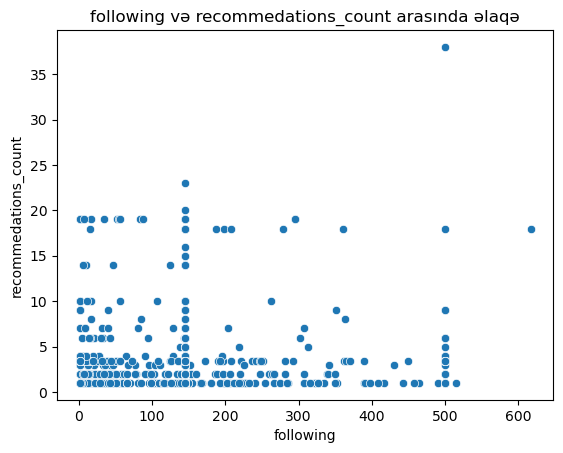

In [35]:
sns.scatterplot(x="following", y="recommendations_count", data=df)
plt.title("following və recommedations_count arasında əlaqə")
plt.xlabel("following")
plt.ylabel("recommedations_count")
plt.show()

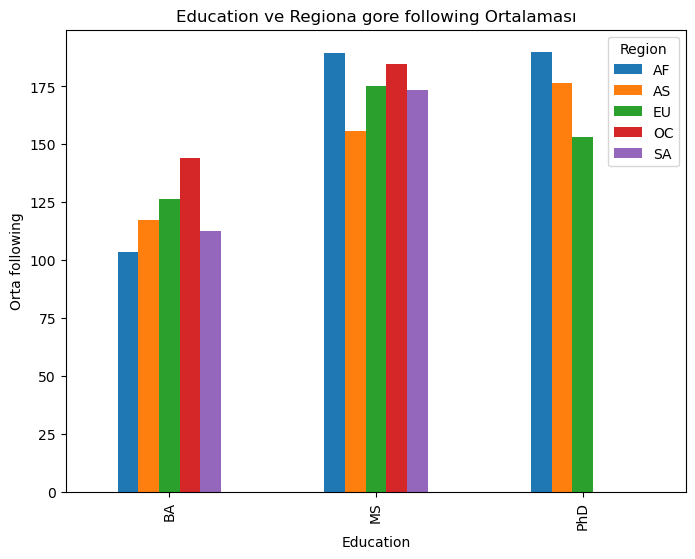

In [36]:
grouped = df.groupby(["education", "region"])["following"].mean().unstack()
grouped.plot(kind="bar", figsize=(8,6))
plt.title("Education ve Regiona gore following Ortalaması")
plt.ylabel("Orta following")
plt.xlabel("Education")
plt.legend(title="Region")
plt.show()

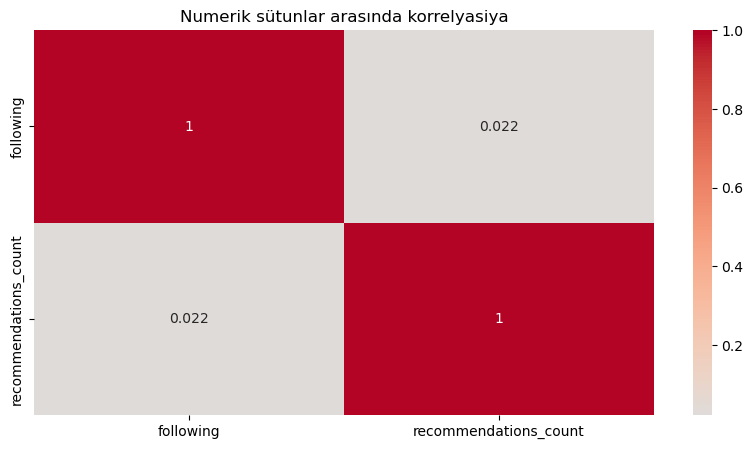

In [20]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Numerik sütunlar arasında korrelyasiya")
plt.show()

In [23]:
df

,timestamp,id,name,city,country_code,region,current_company:company_id,current_company:name,position,following,...,educations_details,education,avatar,languages,certifications,recommendations,recommendations_count,volunteer_experience,сourses,company_name
0,2023-01-10,catherinemcilkenny,"Catherine Fitzpatrick (McIlkenny), B.A",Canada,CA,NaN,NaN,NaN,Snr Business Analyst at Emploi et Développemen...,NaN,...,Queen's University Belfast,"[{""degree"":""Bachelor of Arts (B.A.) Honours"",""...",https://media.licdn.com/dms/image/C4E03AQEcz_j...,NaN,NaN,NaN,NaN,NaN,NaN,
1,2022-12-17,margot-bon-51a04624,Margot Bon,"The Randstad, Netherlands",NL,EU,gemeente-utrecht,Gemeente Utrecht,Communicatieadviseur Corporate & Strategie Gem...,NaN,...,NaN,"[{""degree"":""Scrum en Agile werken"",""end_year"":...",https://static.licdn.com/sc/h/244xhbkr7g40x6bs...,"[{""subtitle"":""Professional working proficiency...","[{""meta"":""Issued Jun 2013"",""subtitle"":""Van der...",Menno H. Poort “Ik werk al jaren prettig met M...,2.0,"[{""cause"":"""",""duration"":""Sep 2010 Jul 2020 9 y...",NaN,Gemeente Utrecht
2,2023-05-17,mike-dean-8509a193,Mike Dean,"England, United Kingdom",UK,NaN,network-rail,Network Rail,Network Data Manager at Network Rail,NaN,...,Brighton Polytechnic,"[{""degree"":""2:2"",""end_year"":""1991"",""field"":""El...",https://media.licdn.com/dms/image/C4D03AQHLj-Z...,NaN,NaN,NaN,NaN,NaN,NaN,Network Rail
3,2022-05-29,giovanna-panarella-99a0a4167,Giovanna Panarella,"Avellino, Campania, Italy",IT,EU,NaN,Freelance,Architetto (Freelance),500.0,...,Università di Camerino,"[{""degree"":""“Corso di aggiornamento profession...",https://media-exp1.licdn.com/dms/image/C4D03AQ...,NaN,NaN,NaN,NaN,"[{""cause"":""Arts and Culture"",""duration"":""Jan 2...",NaN,Freelance
4,2022-12-06,steve-latimer-3364327,Steve Latimer,"Ontario, Canada",CA,NaN,mid-range-computer-group-inc.,Mid-Range Computer Group Inc.,Senior Account Executive at Mid-Range Computer...,NaN,...,St. Michael's College School,"[{""degree"":"""",""end_year"":""1978"",""field"":"""",""me...",NaN,NaN,"[{""meta"":""Issued Jan 2022 See credential"",""sub...","Blake Reeves “If I was a customer, I would wan...",1.0,NaN,NaN,Mid-Range Computer Group Inc.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2022-03-29,lore-geduhn-58978171,Lore Geduhn,"Hagen, North Rhine-Westphalia, Germany",DE,EU,NaN,Awwads Lernzirkel,Bürokraft bei Awwads Lernzirkel,1.0,...,NaN,NaN,https://static-exp1.licdn.com/sc/h/244xhbkr7g4...,NaN,NaN,NaN,NaN,NaN,NaN,Awwads Lernzirkel
996,2022-01-23,aaron-rodzinak-6005403,Aaron Rodzinak,"Boulder, Colorado, United States",US,NaN,ball-aerospace,Ball Aerospace,"Principal Spacecraft Systems Engineer, Ball Ae...",397.0,...,Embry-Riddle Aeronautical University,"[{""degree"":""BSAE"",""end_year"":""1994"",""field"":""A...",https://static-exp1.licdn.com/sc/h/244xhbkr7g4...,NaN,NaN,NaN,NaN,NaN,NaN,Ball Aerospace
997,2021-04-30,carmen-nemoianu-a2130869,carmen nemoianu,Romania,RO,AS,NaN,NaN,medic,29.0,...,facultatea de medicina Timisoara Education fac...,"[{""degree"":""medic primar -doctor in medicina"",...",https://static-exp1.licdn.com/sc/h/244xhbkr7g4...,NaN,NaN,NaN,NaN,NaN,NaN,
998,2022-02-09,carlos-soriano-51022049,Carlos Soriano,Greater Houston,US,NaN,NaN,NaN,Seeking,457.0,...,Lee University,"[{""degree"":""Bachelor of Business Administratio...",https://media-exp1.licdn.com/dms/image/C4E03AQ...,"[{""subtitle"":""-"",""title"":""Spanish""},{""subtitle...",NaN,NaN,NaN,NaN,NaN,


timestamp                       0
id                              0
name                            0
city                           46
country_code                    2
region                        457
current_company:company_id    250
current_company:name            1
position                        4
following                     423
about                         359
posts                         442
groups                        702
current_company                 0
experience                      3
url                             0
people_also_viewed            124
educations_details            226
education                     195
avatar                        149
languages                     575
certifications                631
recommendations               641
recommendations_count         641
volunteer_experience          695
сourses                       788
company_name                    0
dtype: int64


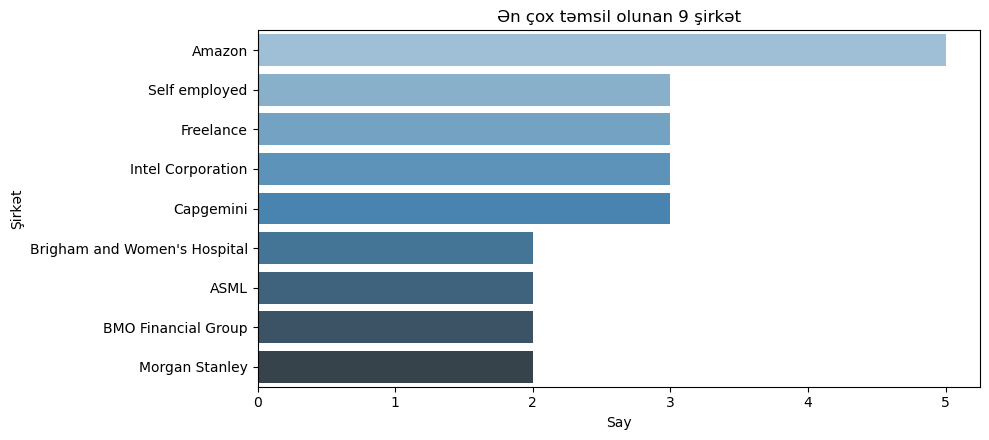

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

top_companies = df['current_company:name'].value_counts().head(9)

plt.figure(figsize=(10, 4.5))
sns.barplot(x=top_companies.values, y=top_companies.index, palette='Blues_d')
plt.title('Ən çox təmsil olunan 9 şirkət')
plt.xlabel('Say')
plt.ylabel('Şirkət')
plt.tight_layout()
plt.show()

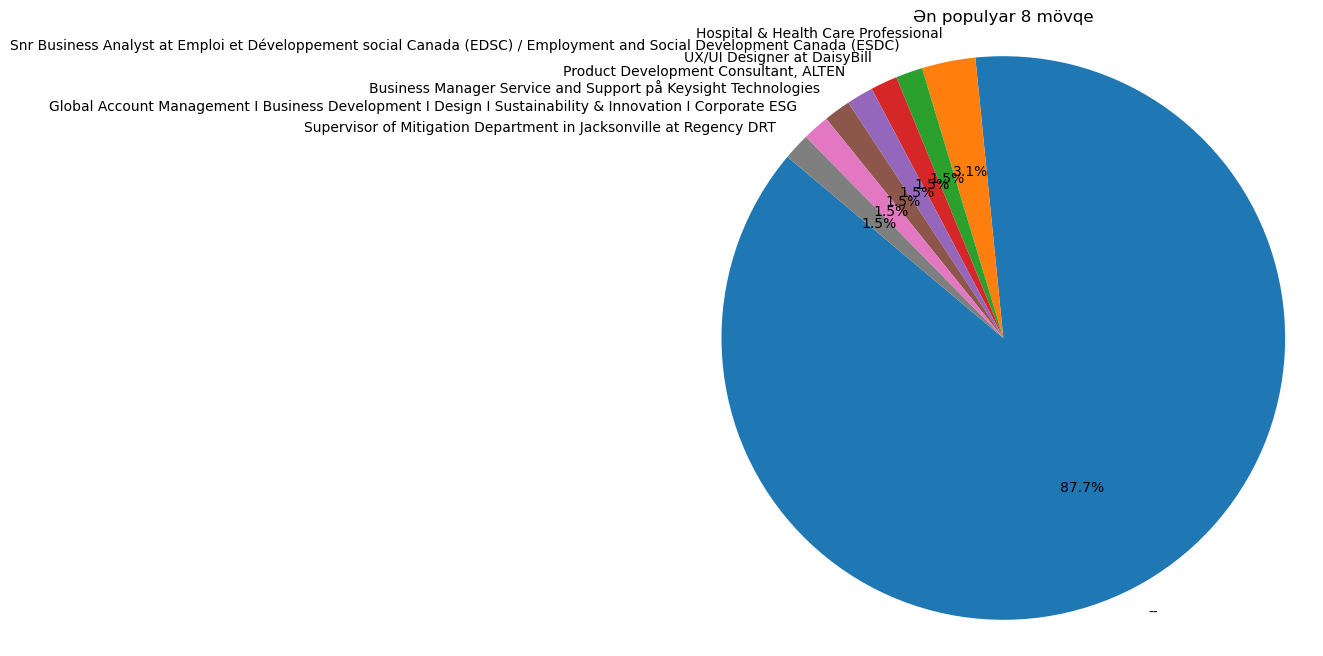

In [70]:
top_positions = df['position'].value_counts().head(8)

plt.figure(figsize=(8, 8))
plt.pie(top_positions.values, labels=top_positions.index, autopct='%1.1f%%', startangle=140)
plt.title('Ən populyar 8 mövqe')
plt.axis('equal')
plt.show()

In [58]:
# Ən çox nümayəndə olunan şəhərlər
top_cities = df['city'].value_counts().head(10)

# Ən çox nümayəndə olunan ölkə kodları
top_countries = df['country_code'].value_counts().head(10)
top_cities
top_countries

country_code
US    293
IN     49
GB     37
AU     33
UK     28
CA     25
BR     25
NL     21
DE     19
ES     18
Name: count, dtype: int64

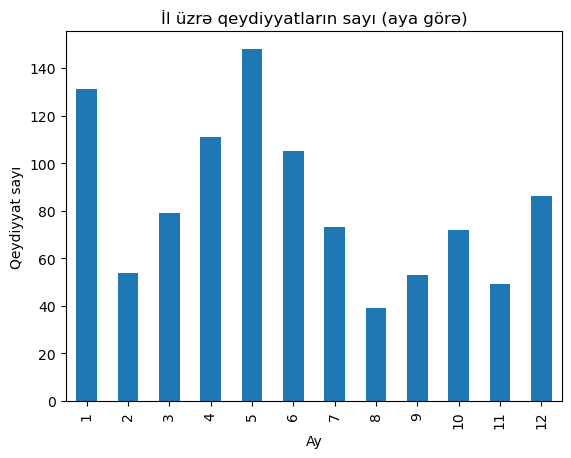

In [23]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month

df['month'].value_counts().sort_index().plot(kind='bar')
plt.title("İl üzrə qeydiyyatların sayı (aya görə)")
plt.xlabel("Ay")
plt.ylabel("Qeydiyyat sayı")
plt.show()

In [24]:
import json

def extract_positions(exp_json):
    try:
        data = json.loads(exp_json)
        positions = []
        for item in data:
            pos = item.get('position') or item.get('title') or item.get('position_name') or None
            if pos:
                positions.append(pos)
            else:
                positions.append('Naməlum')
        if not positions:
            return ['Naməlum']
        return positions
    except Exception:
        return ['Naməlum']
df['experience_positions'] = df['experience'].apply(extract_positions)
def has_switched(positions):
    # Unikal mövqelərdən ibarət siyahı, eyni mövqedən sonra təkrar sayılmır
    unique_positions = []
    for pos in positions:
        if not unique_positions or pos != unique_positions[-1]:
            unique_positions.append(pos)
    return len(unique_positions) > 1  # Əgər 1-dən çox mövqe varsa, sahə dəyişib
switchers = df[df['experience_positions'].apply(has_switched)]
total_people = len(df)
switchers_count = len(switchers)
switchers_percent = (switchers_count / total_people) * 100

print(f"Ümumi insan sayı: {total_people}")
print(f"Sahə dəyişənlərin sayı: {switchers_count}")
print(f"Faiz: {switchers_percent:.2f}%")
from collections import Counter

def get_transitions(positions):
    unique_positions = []
    for pos in positions:
        if not unique_positions or pos != unique_positions[-1]:
            unique_positions.append(pos)
    transitions = [(unique_positions[i], unique_positions[i+1]) for i in range(len(unique_positions)-1)]
    return transitions

all_transitions = switchers['experience_positions'].apply(get_transitions).sum()
transition_counts = Counter(all_transitions)

print("\nƏn çox dəyişilən sahə keçidləri:")
for (from_pos, to_pos), count in transition_counts.most_common(10):
    print(f"{from_pos} → {to_pos}: {count} dəfə")

Ümumi insan sayı: 1000
Sahə dəyişənlərin sayı: 157
Faiz: 15.70%

Ən çox dəyişilən sahə keçidləri:
Naməlum → Co Founder: 2 dəfə
Naməlum → Manager: 2 dəfə
Game Designer → Professional Player: 2 dəfə
Reservdelar/Budbil → Salesman: 2 dəfə
Naməlum → Social Media: 2 dəfə
Consultant Sage X3 → Freelance Software development engineer: 1 dəfə
Freelance Software development engineer → Consultant Web-Marketing / SEO: 1 dəfə
Consultant Web-Marketing / SEO → Chargé du Système d'Information RH Opérationnel: 1 dəfə
Chargé du Système d'Information RH Opérationnel → Consultant BI: 1 dəfə
Consultant BI → stagiaire,Concepteur Développeur: 1 dəfə
